In [1]:
# Jupyter notebook for analyzing DOGAMI raster data
# Computes raster statistics for a (small) square map area within each raster file
# The calculation is repeated for each lon/lat point in a grid of points that
# are contained within the disaster neighborhoods in Portland
import geopandas as gpd
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
from get_mapsquare_rasterstats import get_mapsquare_rasterstats

In [4]:
# Compute grid of lon/lat values that are all contained within the extent of
# the disaster neighborhoods
delta_dec = 2
delta_con = 2
geom_params = {
    'from_file': {
            'name':'./Data/DisasterNeighborhoods_FIXED_final/RLIS_ST_clips_pdx_jurisa_FIXED.dbf',
    }
}
dn_gdf = gpd.read_file(geom_params['from_file']['name'])
total_bounds = dn_gdf['geometry'].total_bounds
total_bounds = [round(tb, delta_dec) for tb in total_bounds]
delta = delta_con*10**-(delta_dec+1)
lon_grid, lat_grid = np.mgrid[total_bounds[0]:total_bounds[2]:delta,
                              total_bounds[1]:total_bounds[3]:delta]
lons = np.ravel(lon_grid)
lats = np.ravel(lat_grid)
points = gpd.GeoSeries([Point(lon, lat) for lon, lat in zip(lons, lats)])
point_in_dn = points.intersects(dn_gdf['geometry'].unary_union)
print(total_bounds, delta)
print(len(lons), len(lats))

[-122.84, 45.43, -122.47, 45.65] 0.002
20460 20460


10593


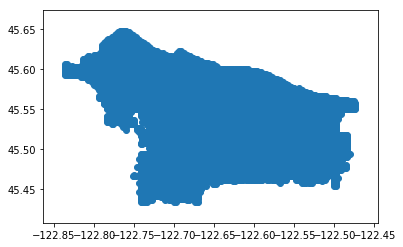

In [5]:
# Make a plot of the center of each square within the lon/lat
# grid that lies within the disaster neighborhoods
# Should produce dense set of points with outer edge defined by the
# boundary of the disaster neighborhoods
#fig, ax = plt.subplots(1, figsize=(8, 8))
points[point_in_dn].plot()
print(len(points[point_in_dn]))

In [ ]:
lons = [-122.6263038077892, -122.6263038077892]
lats = [45.4585072924327, 45.4595072924327]
# compute raster stats for each lon/lat pair in lons/lats "grid"
# store results in list of geodataframes, then combine into single gdf
gdf_list = []
for lon, lat in zip(lons, lats):
    print("\nAnalyzing map square centered on lon = {0:0.4f}, lat = {1:0.4f}".format(lon, lat))
    gdf_list.append(get_mapsquare_rasterstats(lon, lat))
gdf_final = pd.concat(gdf_list, ignore_index=True)
print(gdf_final)